In [26]:
# Dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as st
import csv

In [27]:
# Data filepaths
data_residence = Path("Base Data/data_residence.csv")

In [28]:
# Read the data 
data_residence_df = pd.read_csv(data_residence, encoding="ISO-8859-1")

In [29]:
# List of columns within the DataFrame
data_residence_df.columns

Index(['Area of usual residence (code)', 'Area of usual residence (name)',
       'Area of usual residence (geography)', 'Live births', 'Stillbirths',
       'Perinatal deaths', 'Neonatal deaths', 'Postneonatal deaths',
       'Infant deaths', 'Stillbirth rate', 'Stillbirth unreliable indicator ',
       'Perinatal mortality rate', 'Perinatal unreliable indicator ',
       'Neonatal mortality rate', 'Neonatal unreliable indicator',
       'Postneonatal mortality rate', 'Postneonatal unreliable indicator',
       'Infant mortality rate', 'Infant unreliable indicator '],
      dtype='object')

In [30]:
# Delete columns not required
data_reduced_df = data_residence_df
data_reduced_df = data_reduced_df.drop(columns=['Stillbirth rate', 'Stillbirth unreliable indicator ', 'Perinatal mortality rate', 'Perinatal unreliable indicator ', 'Neonatal mortality rate', 'Neonatal unreliable indicator', 'Postneonatal mortality rate', 'Postneonatal unreliable indicator', 'Infant mortality rate', 'Infant unreliable indicator '])
data_reduced_df.head()

,Area of usual residence (code),Area of usual residence (name),Area of usual residence (geography),Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths
0,"K04000001, J99000001","ENGLAND, WALES AND ELSEWHERE",Country,"624,828","2,597","3,950","1,715",608.0,"2,323"
1,K04000001,ENGLAND AND WALES,Country,"624,729","2,577","3,927","1,709",603.0,"2,312"
2,E92000001,ENGLAND,Country,"595,948","2,451","3,747","1,633",576.0,"2,209"
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26.0,87
4,E06000047,County Durham,Unitary Authority,"4,592",17,27,14,4.0,18


In [31]:
# Rename headers
reduced_df = data_reduced_df
reduced_df = reduced_df.rename(columns={"Area of usual residence (code)": "Area Code",
                                        "Area of usual residence (name)": "Area Name",
                                        "Area of usual residence (geography)": "Area Geography", })
reduced_df.head()

,Area Code,Area Name,Area Geography,Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths
0,"K04000001, J99000001","ENGLAND, WALES AND ELSEWHERE",Country,"624,828","2,597","3,950","1,715",608.0,"2,323"
1,K04000001,ENGLAND AND WALES,Country,"624,729","2,577","3,927","1,709",603.0,"2,312"
2,E92000001,ENGLAND,Country,"595,948","2,451","3,747","1,633",576.0,"2,209"
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26.0,87
4,E06000047,County Durham,Unitary Authority,"4,592",17,27,14,4.0,18


In [32]:
# Remove NaN rows
complete_df = reduced_df.dropna(how='any')
complete_df.count()

Area Code              376
Area Name              376
Area Geography         376
Live births            376
Stillbirths            376
Perinatal deaths       376
Neonatal deaths        376
Postneonatal deaths    376
Infant deaths          376
dtype: int64

In [33]:
# Verify NaN rows removed
display(complete_df.iloc[:])

,Area Code,Area Name,Area Geography,Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths
0,"K04000001, J99000001","ENGLAND, WALES AND ELSEWHERE",Country,"624,828","2,597","3,950","1,715",608.0,"2,323"
1,K04000001,ENGLAND AND WALES,Country,"624,729","2,577","3,927","1,709",603.0,"2,312"
2,E92000001,ENGLAND,Country,"595,948","2,451","3,747","1,633",576.0,"2,209"
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26.0,87
4,E06000047,County Durham,Unitary Authority,"4,592",17,27,14,4.0,18
...,...,...,...,...,...,...,...,...,...
371,W06000019,Blaenau Gwent,Unitary Authority,673,2,2,1,0.0,1
372,W06000020,Torfaen,Unitary Authority,943,4,5,2,1.0,3
373,W06000021,Monmouthshire,Unitary Authority,727,3,5,2,0.0,2
374,W06000022,Newport,Unitary Authority,"1,890",12,16,7,2.0,9


In [34]:
# Return data by Region only
region_df = complete_df[complete_df['Area Geography'].str.contains('Region')]
display(region_df)

,Area Code,Area Name,Area Geography,Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26.0,87
17,E12000002,NORTH WEST,Region,"78,127",345,504,218,95.0,313
61,E12000003,YORKSHIRE AND THE HUMBER,Region,"56,377",259,405,175,62.0,237
86,E12000004,EAST MIDLANDS,Region,"47,860",203,309,138,53.0,191
126,E12000005,WEST MIDLANDS,Region,"63,846",289,523,288,72.0,360
161,E12000006,EAST,Region,"67,054",252,376,160,54.0,214
212,E12000007,LONDON,Region,"110,961",481,689,257,110.0,367
248,E12000008,SOUTH EAST,Region,"94,292",343,540,239,72.0,311
319,E12000009,SOUTH WEST,Region,"52,278",176,252,97,32.0,129


In [35]:
# Convert required columns as a integers
region_df = region_df.astype({'Stillbirths':'int'})
region_df = region_df.astype({'Perinatal deaths':'int'})
region_df = region_df.astype({'Neonatal deaths':'int'})
region_df = region_df.astype({'Postneonatal deaths':'int'})
region_df = region_df.astype({'Infant deaths':'int'})
display(region_df)

,Area Code,Area Name,Area Geography,Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26,87
17,E12000002,NORTH WEST,Region,"78,127",345,504,218,95,313
61,E12000003,YORKSHIRE AND THE HUMBER,Region,"56,377",259,405,175,62,237
86,E12000004,EAST MIDLANDS,Region,"47,860",203,309,138,53,191
126,E12000005,WEST MIDLANDS,Region,"63,846",289,523,288,72,360
161,E12000006,EAST,Region,"67,054",252,376,160,54,214
212,E12000007,LONDON,Region,"110,961",481,689,257,110,367
248,E12000008,SOUTH EAST,Region,"94,292",343,540,239,72,311
319,E12000009,SOUTH WEST,Region,"52,278",176,252,97,32,129


In [36]:
# Display sum of rows
region_deaths_sum  = region_df.sum(axis=1, numeric_only=True)
display(region_deaths_sum)

3       426
17     1475
61     1138
86      894
126    1532
161    1056
212    1904
248    1505
319     686
dtype: int64

In [37]:
# Display totals as a new column
region_total_df = region_df.assign(Total_deaths=region_deaths_sum)

# Display the DataFrame with the new 'Total deaths' column
display(region_total_df)

,Area Code,Area Name,Area Geography,Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths,Total_deaths
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26,87,426
17,E12000002,NORTH WEST,Region,"78,127",345,504,218,95,313,1475
61,E12000003,YORKSHIRE AND THE HUMBER,Region,"56,377",259,405,175,62,237,1138
86,E12000004,EAST MIDLANDS,Region,"47,860",203,309,138,53,191,894
126,E12000005,WEST MIDLANDS,Region,"63,846",289,523,288,72,360,1532
161,E12000006,EAST,Region,"67,054",252,376,160,54,214,1056
212,E12000007,LONDON,Region,"110,961",481,689,257,110,367,1904
248,E12000008,SOUTH EAST,Region,"94,292",343,540,239,72,311,1505
319,E12000009,SOUTH WEST,Region,"52,278",176,252,97,32,129,686


In [38]:
# Rename headers
revised_df = region_total_df
revised_df = revised_df.rename(columns={"Total_deaths": "Total deaths"})
print("Value of row 1")
display(revised_df.iloc[:])

Value of row 1


,Area Code,Area Name,Area Geography,Live births,Stillbirths,Perinatal deaths,Neonatal deaths,Postneonatal deaths,Infant deaths,Total deaths
3,E12000001,NORTH EAST,Region,"25,153",103,149,61,26,87,426
17,E12000002,NORTH WEST,Region,"78,127",345,504,218,95,313,1475
61,E12000003,YORKSHIRE AND THE HUMBER,Region,"56,377",259,405,175,62,237,1138
86,E12000004,EAST MIDLANDS,Region,"47,860",203,309,138,53,191,894
126,E12000005,WEST MIDLANDS,Region,"63,846",289,523,288,72,360,1532
161,E12000006,EAST,Region,"67,054",252,376,160,54,214,1056
212,E12000007,LONDON,Region,"110,961",481,689,257,110,367,1904
248,E12000008,SOUTH EAST,Region,"94,292",343,540,239,72,311,1505
319,E12000009,SOUTH WEST,Region,"52,278",176,252,97,32,129,686


In [39]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import random

# Create an array that contains the number of users each region has
deaths = [426, 1475, 1138, 894, 1532, 1056, 1904, 1505, 686]
x_axis = np.arange(len(deaths))

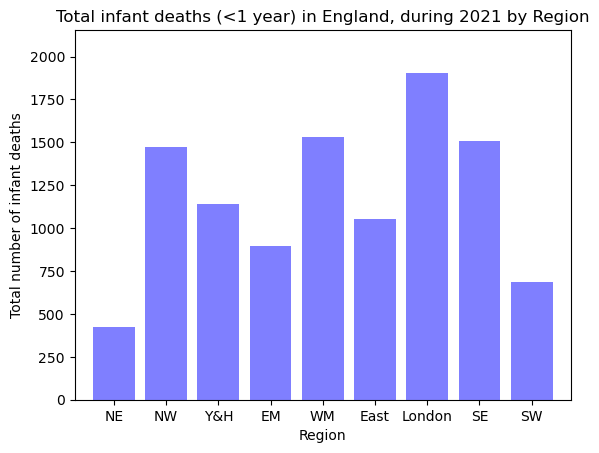

In [72]:
# Create bar chart, label and set limits for x and y axis
plt.bar(x_axis, deaths, color='b', alpha=0.5, align="center")
labels_x = [value for value in x_axis]
plt.xticks(labels_x, ["NE", "NW", "Y&H", "EM", "WM", "East", "London", "SE", "SW"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(deaths)+250)
plt.xlabel("Region")
plt.ylabel("Total number of infant deaths")

# Name chart_1
plt.title("Total infant deaths (<1 year) in England, during 2021 by Region")
plt.show()

In [41]:
# Save chart_1
plt.savefig("Base Data/Bar_Chart_Total_Deaths.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [42]:
# Create an array that contains the number of births each region has
live_births = [25153, 78127, 56377, 47860, 63846, 67054, 110961, 94292, 52278]
x_axis = np.arange(len(live_births))

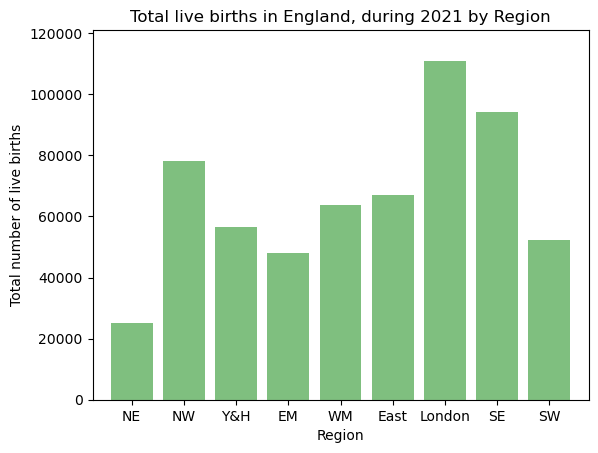

In [43]:
# Create bar chart, label and set limits for x and y axis - Number of live births
plt.bar(x_axis, live_births, color='g', alpha=0.5, align="center")
labels_x = [value for value in x_axis]
plt.xticks(labels_x, ["NE", "NW", "Y&H", "EM", "WM", "East", "London", "SE", "SW"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(live_births)+10000)
plt.xlabel("Region")
plt.ylabel("Total number of live births")

# Name chart_2
plt.title("Total live births in England, during 2021 by Region")
plt.show()

In [44]:
# Save chart_2
plt.savefig("Base Data/Bar_Chart_Live_Births.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [45]:
# Reduce columns further to return only live births and 
reduced_totalbirths_df = revised_df
reduced_totalbirths_df = reduced_totalbirths_df.drop(columns=['Stillbirths', 'Perinatal deaths', 'Neonatal deaths', 'Postneonatal deaths', 'Infant deaths'])
reduced_totalbirths_df.head()
print("Value of row 1")
display(reduced_totalbirths_df.iloc[:])

Value of row 1


,Area Code,Area Name,Area Geography,Live births,Total deaths
3,E12000001,NORTH EAST,Region,"25,153",426
17,E12000002,NORTH WEST,Region,"78,127",1475
61,E12000003,YORKSHIRE AND THE HUMBER,Region,"56,377",1138
86,E12000004,EAST MIDLANDS,Region,"47,860",894
126,E12000005,WEST MIDLANDS,Region,"63,846",1532
161,E12000006,EAST,Region,"67,054",1056
212,E12000007,LONDON,Region,"110,961",1904
248,E12000008,SOUTH EAST,Region,"94,292",1505
319,E12000009,SOUTH WEST,Region,"52,278",686


In [46]:
# Convert Live births from str to float 
reduced_totalbirths_df["Live births"] = [float(str(i).replace(",", "")) for i in reduced_totalbirths_df["Live births"]]
display(reduced_totalbirths_df)

,Area Code,Area Name,Area Geography,Live births,Total deaths
3,E12000001,NORTH EAST,Region,25153.0,426
17,E12000002,NORTH WEST,Region,78127.0,1475
61,E12000003,YORKSHIRE AND THE HUMBER,Region,56377.0,1138
86,E12000004,EAST MIDLANDS,Region,47860.0,894
126,E12000005,WEST MIDLANDS,Region,63846.0,1532
161,E12000006,EAST,Region,67054.0,1056
212,E12000007,LONDON,Region,110961.0,1904
248,E12000008,SOUTH EAST,Region,94292.0,1505
319,E12000009,SOUTH WEST,Region,52278.0,686


In [47]:
# Find total births (live births and deaths)
totalbirths_sum  = reduced_totalbirths_df.sum(axis=1, numeric_only=True)
display(totalbirths_sum)

3       25579.0
17      79602.0
61      57515.0
86      48754.0
126     65378.0
161     68110.0
212    112865.0
248     95797.0
319     52964.0
dtype: float64

In [48]:
# Display totals as a new column
totalbirths_sum_df = reduced_totalbirths_df.assign(Total_births=totalbirths_sum)

# Display the DataFrame with the new 'Total births' column
display(totalbirths_sum_df)

,Area Code,Area Name,Area Geography,Live births,Total deaths,Total_births
3,E12000001,NORTH EAST,Region,25153.0,426,25579.0
17,E12000002,NORTH WEST,Region,78127.0,1475,79602.0
61,E12000003,YORKSHIRE AND THE HUMBER,Region,56377.0,1138,57515.0
86,E12000004,EAST MIDLANDS,Region,47860.0,894,48754.0
126,E12000005,WEST MIDLANDS,Region,63846.0,1532,65378.0
161,E12000006,EAST,Region,67054.0,1056,68110.0
212,E12000007,LONDON,Region,110961.0,1904,112865.0
248,E12000008,SOUTH EAST,Region,94292.0,1505,95797.0
319,E12000009,SOUTH WEST,Region,52278.0,686,52964.0


In [53]:
# Rename Total_births header
reduced_totalbirths_sum_df = totalbirths_sum_df
reduced_totalbirths_sum_df = totalbirths_sum_df.rename(columns={"Total_births": "Total births", })
reduced_totalbirths_sum_df.head()

print("Value of row 1")
display(reduced_totalbirths_sum_df.iloc[:])

Value of row 1


,Area Code,Area Name,Area Geography,Live births,Total deaths,Total births
3,E12000001,NORTH EAST,Region,25153.0,426,25579.0
17,E12000002,NORTH WEST,Region,78127.0,1475,79602.0
61,E12000003,YORKSHIRE AND THE HUMBER,Region,56377.0,1138,57515.0
86,E12000004,EAST MIDLANDS,Region,47860.0,894,48754.0
126,E12000005,WEST MIDLANDS,Region,63846.0,1532,65378.0
161,E12000006,EAST,Region,67054.0,1056,68110.0
212,E12000007,LONDON,Region,110961.0,1904,112865.0
248,E12000008,SOUTH EAST,Region,94292.0,1505,95797.0
319,E12000009,SOUTH WEST,Region,52278.0,686,52964.0


In [50]:
# Create an array that contains the number of births each region has
deaths = [426, 1475, 1138, 894, 1532, 1056, 1904, 1505, 686]
total_births = [25579, 79602, 57515, 48754, 65378, 68110, 112865, 95797, 52964]
x_axis = np.arange(len(live_births))

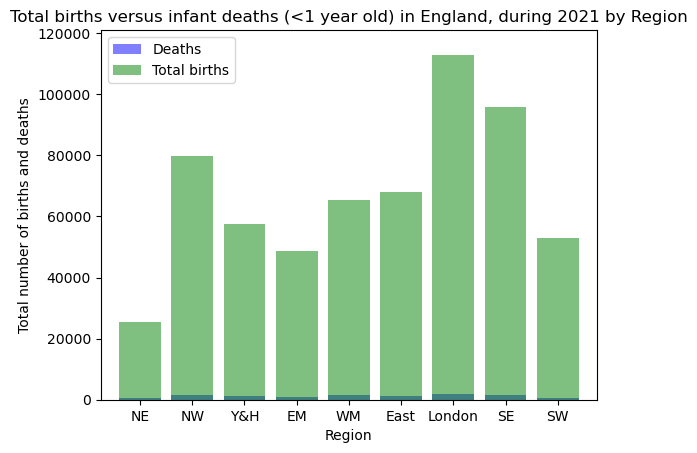

In [74]:
# Create bar chart, label and set limits for x and y axis - Total live births vs deaths)
plt.bar(x_axis, deaths, color='b', alpha=0.5, align="center", label="Deaths")
plt.bar(x_axis, total_births, color='g', alpha=0.5, align="center", label="Total births")
plt.legend(loc='best')

labels_x = [value for value in x_axis]
plt.xticks(labels_x, ["NE", "NW", "Y&H", "EM", "WM", "East", "London", "SE", "SW"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(live_births)+10000)
plt.xlabel("Region")
plt.ylabel("Total number of births and deaths")

# Name chart_3
plt.title("Total births versus infant deaths (<1 year old) in England, during 2021 by Region")
plt.show()

In [70]:
# Save chart_3
plt.savefig("Base Data/Bar_Chart_BirthsDeaths.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [140]:
#create df to calculate deaths as a pc of total births
relative_df = pd.DataFrame({'Regions': ['NE', 'NW', 'Y&H', 'EM', 'WM', 'East', 'London', 'SE', 'SW'],
                   'Total births': [25579, 79602, 57515, 48754, 65378, 68110, 112865, 95797, 52964],
                   'Total deaths': [426, 1475, 1138, 894, 1532, 1056, 1904, 1505, 686]})

display(relative_df)

,Regions,Total births,Total deaths
0,NE,25579,426
1,NW,79602,1475
2,Y&H,57515,1138
3,EM,48754,894
4,WM,65378,1532
5,East,68110,1056
6,London,112865,1904
7,SE,95797,1505
8,SW,52964,686


In [158]:
#calculate percentage of total points scored grouped by team
relative_updated_df = relative_df
relative_updated_df['Deaths (as % Total births)'] = relative_df['Total deaths'] / relative_df.groupby('Total births')['Total births'].transform('sum') * 100

#view updated DataFrame
display(relative_updated_df)

,Regions,Total births,Total deaths,Deaths (as % Total births)
0,NE,25579,426,1.665429
1,NW,79602,1475,1.852969
2,Y&H,57515,1138,1.978614
3,EM,48754,894,1.833696
4,WM,65378,1532,2.343296
5,East,68110,1056,1.550433
6,London,112865,1904,1.686971
7,SE,95797,1505,1.571030
8,SW,52964,686,1.295219


In [166]:
# Reduce decimal places
relative_updated_df.style.format(precision=1)

,Regions,Total births,Total deaths,Deaths (as % Total births)
0,NE,25579,426,1.7
1,NW,79602,1475,1.9
2,Y&H,57515,1138,2.0
3,EM,48754,894,1.8
4,WM,65378,1532,2.3
5,East,68110,1056,1.6
6,London,112865,1904,1.7
7,SE,95797,1505,1.6
8,SW,52964,686,1.3


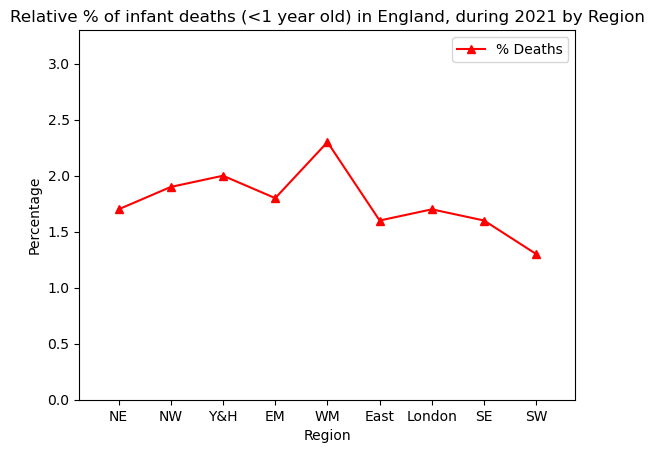

In [189]:
# Create bar chart, label and set limits for x and y axis - chart_4
plt.plot(x_axis, deaths_pc, color='r', marker ='^', label="% Deaths")
plt.legend(loc='best')

labels_x = [value for value in x_axis]
plt.xticks(labels_x, ["NE", "NW", "Y&H", "EM", "WM", "East", "London", "SE", "SW"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(deaths_pc)+1)
plt.xlabel("Region")
plt.ylabel("Percentage")

# Name chart_4
plt.title("Relative % of infant deaths (<1 year old) in England, during 2021 by Region")
plt.show()

In [190]:
# Save chart_4
plt.savefig("Base Data/Bar_Chart_BirthsDeaths.png")
plt.show()

<Figure size 640x480 with 0 Axes>